In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
acc = np.load('data.npy')

In [3]:
z_mean = acc - np.mean(acc)
# z_mean

In [4]:
cov_mat = np.dot(z_mean.T, z_mean) / (z_mean.shape[0] -1)
cov_mat

array([[ 0.60903051, -0.01154377, -0.11573618],
       [-0.01154377,  0.55302565, -0.04716331],
       [-0.11573618, -0.04716331,  0.64765702]])

In [5]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
eig_val, eig_vec

(array([0.74995348, 0.48660968, 0.57315003]),
 array([[-0.62039724,  0.60969885,  0.49333009],
        [-0.14808737,  0.52663687, -0.83709243],
        [ 0.77018011,  0.59238579,  0.23643536]]))

<BarContainer object of 3 artists>

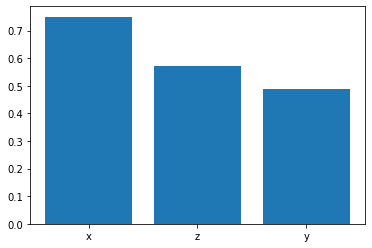

In [6]:
xtrick = ['xyz'[i] for i in np.argsort(eig_val)[::-1]]

plt.xticks(np.arange(3), xtrick)
plt.bar(np.arange(3), np.sort(eig_val)[::-1])

In [7]:
ev = [eig_vec[:, i] * np.sqrt(eig_val[i]) for i in range(3)]
ev

[array([-0.5372631 , -0.12824344,  0.66697485]),
 array([0.42531015, 0.36736826, 0.413233  ]),
 array([ 0.3734838 , -0.63373483,  0.17899735])]

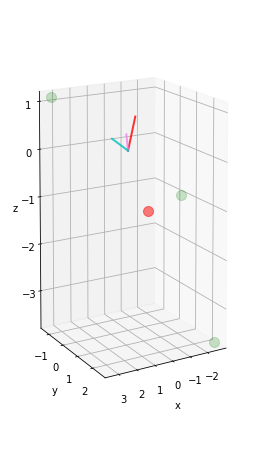

In [8]:
figsize = (20, 8)
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.plot(z_mean[0], z_mean[1], z_mean[2], 'o', markersize=10, color='g', alpha=0.2)
ax.plot([np.mean(z_mean[0])], [np.mean(z_mean[1])], [np.mean(z_mean[2])], 'o', markersize=10, color='r', alpha=0.5)

ax.plot([0, ev[0][0]], [0, ev[0][1]], [0, ev[0][2]], color='r', alpha=0.8, lw=2)
ax.plot([0, ev[1][0]], [0, ev[1][1]], [0, ev[1][2]], color='violet', alpha=0.8, lw=2)
ax.plot([0, ev[2][0]], [0, ev[2][1]], [0, ev[2][2]], color='c', alpha=0.8, lw=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 60)

In [12]:
mat_w = np.hstack((eig_vec[0].reshape(3,1), eig_vec[1].reshape(3,1)))
mat_w

array([[-0.62039724, -0.14808737],
       [ 0.60969885,  0.52663687],
       [ 0.49333009, -0.83709243]])

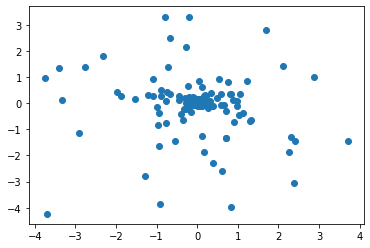

In [40]:
y = np.dot(z_mean, mat_w)
plt.scatter(y[:, 0], y[:, 1])